In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions.handy_functions as hf
from functions.parse_data import synth_dataloader


2024-04-09 07:20:09.754891: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 07:20:09.788196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 07:20:09.788214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 07:20:09.789072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 07:20:09.794789: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#Read data and name columns
df = synth_dataloader(drop_cols=False)
#Dumb down surfaces
df=hf.dumb_down_surface(df)
df.head(10)



,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B08A,Cloud_B09,...,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc,Surface_Desc_Dumb
0,0.95937,0.94195,0.87799,0.92936,0.93407,0.95181,0.96217,0.92871,0.97181,0.49957,...,4.53,52.05,167.66,5.897,3,3335,0.126,0.35,water-snow-mediumgranular,water
1,0.28649,0.30422,0.40100,0.27834,0.57800,1.01964,1.02787,1.00519,1.03599,0.59139,...,12.85,41.68,161.91,1.275,2,1996,0.126,0.31,vegetation-tree-pinus,vegetation
2,0.30657,0.28715,0.25066,0.30366,0.29214,0.34088,0.40079,0.37376,0.48750,0.02092,...,14.53,79.23,168.52,1.799,1,6796,0.127,4.04,soil-mollisol-haplaquoll,soil
3,0.27930,0.27146,0.33719,0.19841,0.46411,0.88787,0.89584,0.87746,0.90439,0.51811,...,6.54,70.23,165.49,0.519,2,3701,0.123,0.22,vegetation-tree-abies,vegetation
4,0.42411,0.39689,0.38594,0.32623,0.37338,0.60678,0.66895,0.55343,0.70168,0.01513,...,8.56,75.15,148.48,8.569,2,6345,0.128,5.40,vegetation-shrub-baccharis,vegetation
5,0.79443,0.75592,0.65853,0.70670,0.71369,0.73147,0.74182,0.71190,0.75003,0.32287,...,12.38,73.72,153.05,16.874,3,1419,0.126,0.51,rock-metamorphic-marble,rock
6,0.38577,0.34660,0.30719,0.27459,0.35268,0.72965,0.74705,0.69842,0.75893,0.18345,...,14.74,73.05,13.63,3.589,3,424,0.122,0.99,vegetation-tree-eucalyptus,vegetation
7,0.22584,0.22494,0.33843,0.19615,0.53821,0.98347,0.99256,0.96757,1.00132,0.53669,...,8.24,53.20,146.76,0.624,2,3427,0.125,0.35,vegetation-tree-pinus,vegetation
8,0.57314,0.57982,0.62369,0.57909,0.75147,0.99608,1.04055,0.94017,1.07212,0.43014,...,11.57,38.00,117.48,13.909,1,6884,0.122,1.88,vegetation-shrub-calocedrus,vegetation
9,0.82388,0.83664,0.80620,0.81432,0.78581,0.81063,0.84108,0.78542,0.85153,0.26374,...,9.69,45.83,23.04,24.937,3,7455,0.106,1.77,rock-igneous-intermediate,rock


In [3]:
clearcols = ['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
             'Clear_B07','Clear_B08','Clear_B08A','Clear_B09','Clear_B10','Clear_B11','Clear_B12']
cloudcols = ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
             'Cloud_B07','Cloud_B08','Cloud_B08A','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12']

nonphotosyntheticvegetation: 15594 = 7.797%
with std: 0.17050875661508383
rock: 21008 = 10.504%
with std: 0.23845628063509214
soil: 10533 = 5.2665%
with std: 0.17342601519111986
vegetation: 141346 = 70.673%
with std: 0.1093317573250767
water: 11519 = 5.7595%
with std: 0.3421117412819181


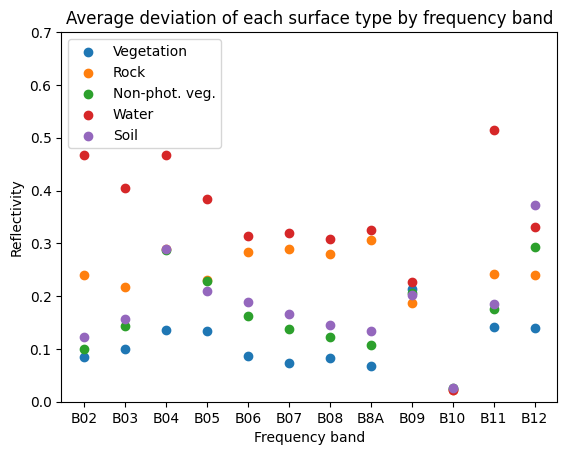

In [17]:
#Find mean of all clear data
means = np.mean(np.array(df[clearcols]),axis=0)
#Find rates of each surf type
surfs_all=np.array(df['Surface_Desc_Dumb'])
unique_surf, count_surf = np.unique(surfs_all, return_counts=True)

#Find stds, and deviations from average, of each surf type
surf_devs=np.zeros([len(unique_surf),len(clearcols)])
for i in range(len(unique_surf)):
    print(unique_surf[i]+': '+str(count_surf[i])+' = '+str(count_surf[i]/2000)+'%')
    surf_data = np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])
    std = np.mean(np.std(surf_data,axis=0))
    print('with std: '+str(std))
    surf_devs[i,:] = np.mean(np.abs(np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])-means),axis=0)
    
#Print deviations
x=np.arange(len(clearcols))
plt.figure()
plt.scatter(x,surf_devs[unique_surf=='vegetation',:])
plt.scatter(x,surf_devs[unique_surf=='rock',:])
plt.scatter(x,surf_devs[unique_surf=='nonphotosyntheticvegetation',:])
plt.scatter(x,surf_devs[unique_surf=='water',:])
plt.scatter(x,surf_devs[unique_surf=='soil',:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Average deviation of each surface type by frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Vegetation','Rock','Non-phot. veg.','Water','Soil'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()


In [5]:
#Find total amount of surface types
unique_surf_all, count_surf_all = np.unique(np.array(df['Surface_Desc']), return_counts=True)
print(len(unique_surf_all))

139


0: 50000 = 25.0% with mean COT:0.0
1: 9985 = 4.9925% with mean COT:14.261318177265897
2: 9967 = 4.9835% with mean COT:9.595307916123208
3: 10130 = 5.065% with mean COT:18.289357255676208
4: 9859 = 4.9295% with mean COT:24.145905974236737
5: 10059 = 5.0295% with mean COT:8.52705964807635
6: 50000 = 25.0% with mean COT:17.15234794
7: 50000 = 25.0% with mean COT:26.988614199999994


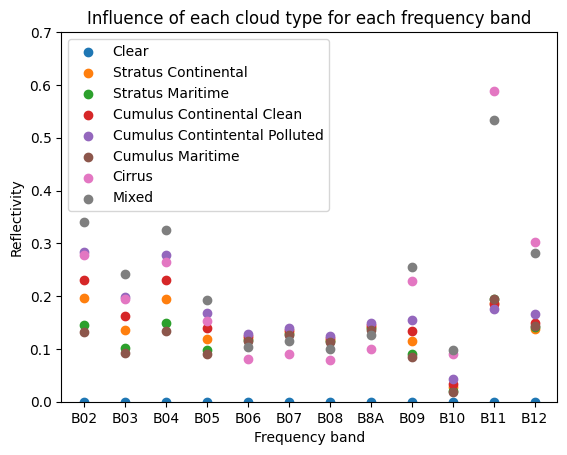

In [18]:
#Find rates of each cloud type, group mixed clouds for clarity
clouds_all=np.array(df['Cloud_Type'])
for i in range(len(clouds_all)):
    if clouds_all[i]>6:
        clouds_all[i]=7
unique_cloud, count_cloud = np.unique(clouds_all, return_counts=True)

#Find influence and COT of each surf type
cloud_inf = np.zeros([len(unique_cloud), len(clearcols)])
for i in range(len(unique_cloud)):
    cloud_data = np.array(df[clouds_all == unique_cloud[i]][cloudcols])-np.array(df[clouds_all == unique_cloud[i]][clearcols])
    cloud_inf[i,:] = np.mean(np.abs(cloud_data),axis=0)
    cloud_COT = np.mean(np.array(df[clouds_all == unique_cloud[i]]['COT']))

    print(str(unique_cloud[i])+': '+str(count_cloud[i])+' = '+str(count_cloud[i]/2000)+'%'+' with mean COT:'+str(cloud_COT))

plt.figure()
for i in range(len(unique_cloud)):
    plt.scatter(x,cloud_inf[i,:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Influence of each cloud type for each frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Clear','Stratus Continental','Stratus Maritime','Cumulus Continental Clean','Cumulus Contintental Polluted','Cumulus Maritime','Cirrus','Mixed'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()